# Data Set Information:
- 사용자의 대출 연체를 예측하는 문제
- 대표적인 불균형 분류 문제
- 개인의 금융거래, 보험, 통신 거래 내역 데이터를 사용


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz
%matplotlib inline

In [153]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [154]:
loan = pd.read_csv('loan_data.csv')

In [155]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43386 entries, 0 to 43385
Data columns (total 23 columns):
AGE              43386 non-null int64
TOT_LOAN         43386 non-null int64
TOT_LOAN_CRD     43386 non-null int64
LOAN_BNK         43386 non-null int64
LOAN_CPT         43386 non-null int64
CRDT_CNT         43386 non-null int64
GUARN_CNT        43386 non-null int64
INCOME           43386 non-null int64
LOAN_CRD_CNT     43386 non-null int64
LATE_RATE        43386 non-null int64
LATE_RATE_1Y     43386 non-null int64
INS_MON_MAX      43386 non-null float64
CANCEL_CNT_1Y    43386 non-null int64
CALL_TIME        43386 non-null float64
TEL_COST_MON     43386 non-null int64
MOBILE_PRICE     43386 non-null int64
SUSP_DAY         43386 non-null int64
LATE_TEL         43386 non-null int64
COMB_COMM        43386 non-null int64
SEX              43386 non-null object
PAY_METHOD       43386 non-null object
JOB              43386 non-null object
TARGET           43386 non-null int64
dtypes: fl

In [156]:
loan.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0


In [157]:
loan.TARGET.unique(), loan.TARGET.mean() # 9% 돈을 안갚는다.

(array([0, 1], dtype=int64), 0.09523809523809523)

In [121]:
loan.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX',
       'PAY_METHOD', 'JOB', 'TARGET'],
      dtype='object')

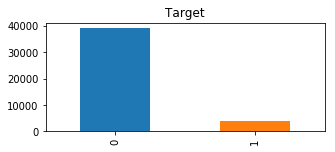

In [122]:
loan.TARGET.value_counts().plot.bar(title='Target', figsize=(5,2))

### 약 9.5% 가 대출연체가 있다.

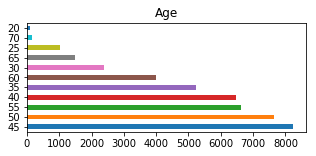

In [123]:
# 연령
loan.AGE.value_counts().plot.barh(title='Age', figsize=(5,2))

### 40대 ~ 50대 대출 비율이 가장 높다.

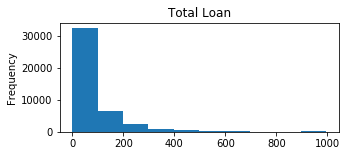

In [124]:
# 대출 총액
loan.TOT_LOAN.plot.hist(title='Total Loan', figsize=(5,2))

### 최대 1000 이하의 대출을 하였으며 거의 100 미만으로 대출 하였다.

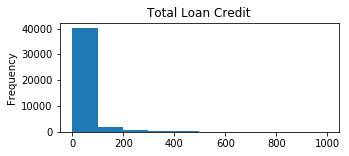

In [125]:
# 신용대출 총액
loan.TOT_LOAN_CRD.plot.hist(title='Total Loan Credit', figsize=(5,2))

### 최대 1000 이하의 대출을 하였으며 거의 100 미만으로 대출 하였다.

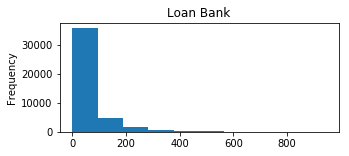

In [126]:
# 은행권에서 발생한 대출 총액
loan.LOAN_BNK.plot.hist(title='Loan Bank', figsize=(5,2))

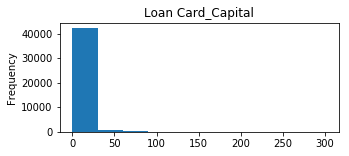

In [127]:
# 카드사/캐피탈에서 발생한 대출 총액
loan.LOAN_CPT.plot.hist(title='Loan Card_Capital', figsize=(5,2))

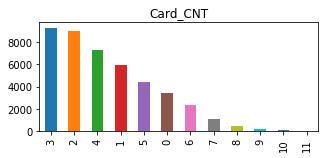

In [128]:
# 신용카드 발급 수
loan.CRDT_CNT.value_counts().plot.bar(title='Card_CNT', figsize=(5,2))

### 2~3개 발급이 가장 많다.

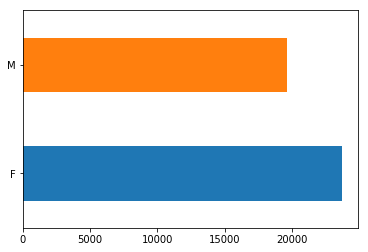

In [129]:
loan.SEX.value_counts().plot.barh()

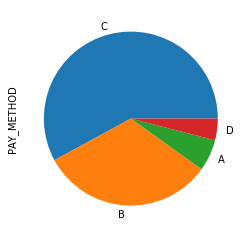

In [130]:
loan.PAY_METHOD.value_counts().plot.pie()

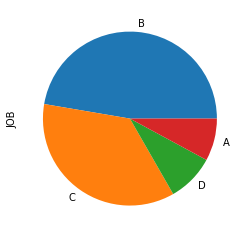

In [131]:
loan.JOB.value_counts().plot.pie()

In [132]:
loan.nunique()

AGE                11
TOT_LOAN          218
TOT_LOAN_CRD      209
LOAN_BNK          203
LOAN_CPT           69
CRDT_CNT           12
GUARN_CNT          11
INCOME             53
LOAN_CRD_CNT       11
LATE_RATE          93
LATE_RATE_1Y        9
INS_MON_MAX        37
CANCEL_CNT_1Y       7
CALL_TIME        1229
TEL_COST_MON       43
MOBILE_PRICE       13
SUSP_DAY          415
LATE_TEL           66
COMB_COMM           2
SEX                 2
PAY_METHOD          4
JOB                 4
TARGET              2
dtype: int64

In [133]:
yy = loan.TARGET
xx = loan.drop(columns='TARGET')

# Object 숫자 처리 필요.
xx = xx.drop(columns='SEX')
xx = xx.drop(columns='PAY_METHOD')
xx = xx.drop(columns='JOB')

In [134]:
x = np.array(xx)
y = np.array(yy)
x.shape, y.shape

((43386, 19), (43386,))

# train/test 나누기

In [135]:
m = (int)(len(x) * 0.8)
m

34708

In [136]:
train_x = x[:m]
train_y = y[:m]
test_x = x[m:]
test_y = y[m:]
train_x.shape, test_x.shape

((34708, 19), (8678, 19))

# 결정 트리로 학습
# 성능 측정

In [137]:
loan.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0


In [138]:
loan.describe()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET
count,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000
mean,46.250980,82.019407,32.829622,49.324897,4.288641,3.004264,0.098695,2778.629051,0.163855,8.216406,6.389619,373.254506,0.024662,2.098970,75.477804,534.423547,18.433320,13.757664,0.425068,0.095238
std,9.693741,126.702976,83.419760,92.443944,12.660968,1.842478,0.529664,2470.097227,0.617522,12.120840,14.556618,690.067030,0.206476,15.364253,62.311464,382.237230,133.523351,53.272289,0.494359,0.293547
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.430000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,36.000000,9.000000,9.000000,0.000000,3.000000,0.000000,3600.000000,0.000000,3.000000,0.000000,190.000000,0.000000,0.990000,60.000000,700.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,102.000000,27.000000,60.000000,3.000000,4.000000,0.000000,4700.000000,0.000000,11.000000,10.000000,390.000000,0.000000,1.887500,80.000000,900.000000,0.000000,0.000000,1.000000,0.000000
max,70.000000,994.000000,994.000000,944.000000,301.000000,11.000000,10.000000,10000.000000,11.000000,100.000000,100.000000,10000.000000,6.000000,1520.000000,950.000000,1200.000000,2700.000000,1200.000000,1.000000,1.000000


In [160]:
model = DecisionTreeClassifier(max_depth=1).fit(train_x, train_y) # 오버피팅이 나지 않게 depth를 정해줌
model.score(train_x, train_y), model.score(test_x, test_y)

(1.0, 0.5238534224475686)

# 트리 그림 그리기

In [161]:
export_graphviz(model, out_file='loan.dot', class_names=['OK','NO'], \
               feature_names=xx.columns)

In [162]:
xx.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM'],
      dtype='object')

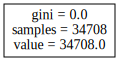

In [163]:
with open('loan.dot') as f:
    graph = f.read()
display(graphviz.Source(graph))

# 중요 특징 그래프

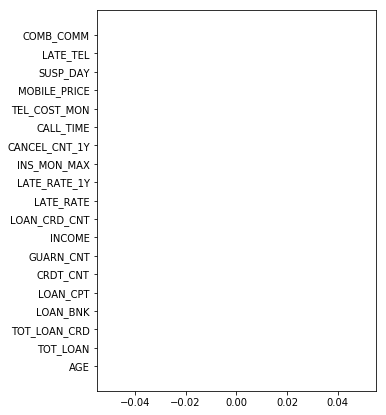

In [165]:
fig = plt.figure(figsize=(5,7))
fig = plt.barh(range(train_x.shape[1]), model.feature_importances_)
fig = plt.yticks(range(train_x.shape[1]), xx.columns)

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0).fit(train_x, train_y)

In [146]:
model.score(train_x, train_y), model.score(test_x, test_y)

(1.0, 0.5238534224475686)

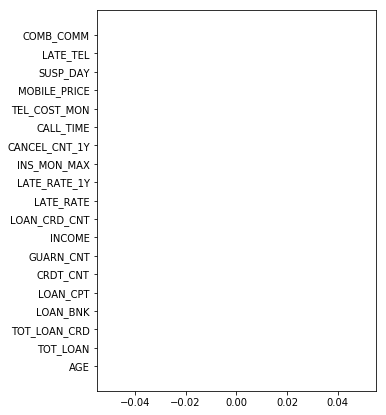

In [147]:
fig = plt.figure(figsize=(5,7))
fig = plt.barh(range(train_x.shape[1]), model.feature_importances_)
fig = plt.yticks(range(train_x.shape[1]), xx.columns)

# GradientBoosting

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
#%timeit model = GradientBoostingClassifier(n_estimators=10).fit(train_x, train_y)
model = GradientBoostingClassifier(n_estimators=10).fit(train_x, train_y)

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

In [150]:
model.score(train_x, train_y), model.score(test_x, test_y)

(1.0, 0.5238534224475686)

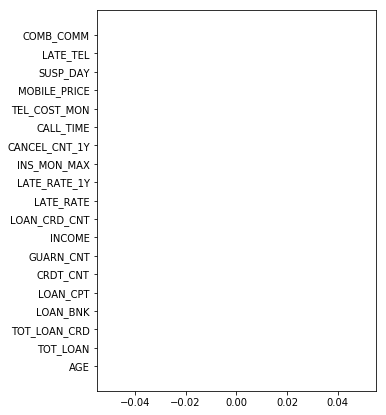

In [151]:
fig = plt.figure(figsize=(5,7))
fig = plt.barh(range(train_x.shape[1]), model.feature_importances_)
fig = plt.yticks(range(train_x.shape[1]), xx.columns)

# SVM 